Task 1: Restaurant Aggregate Rating Prediction

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"\Users\ADMIN\Downloads\Dataset .csv")
print("Dataset is loaded Successfully")

Dataset is loaded Successfully


In [26]:
print("Inspecting the structure")
df.info()

Inspecting the structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 

In [27]:
print("First 5 items in Aggregate Rating")
df.head()

First 5 items in Aggregate Rating


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [28]:
print("Summarizing statistics for Aggregate Rating")
df['Aggregate rating'].describe()

Summarizing statistics for Aggregate Rating


count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

Visualize the distribution of target variable (Aggregate Rating)


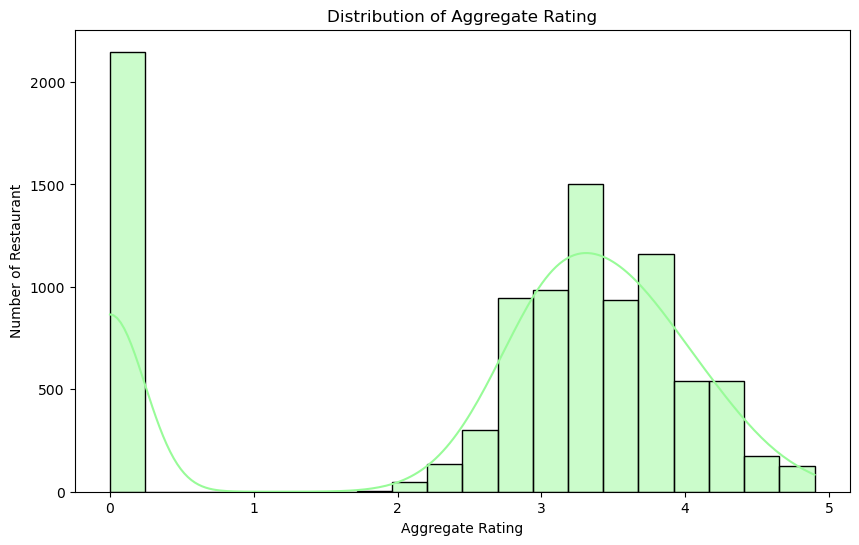

In [29]:
print("Visualize the distribution of target variable (Aggregate Rating)")
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['Aggregate rating'],kde = True,bins = 20,color = "paleGreen")
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurant')
plt.show()

In [30]:
print("Checking for Nan values / missing values")
df.isnull().sum()

Checking for Nan values / missing values


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [31]:
print("Handling missing Values in 'Cuisines' Column")
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
print("Again Check for Nan values and Missing Values")
df.isnull().sum()

Handling missing Values in 'Cuisines' Column
Again Check for Nan values and Missing Values


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [32]:
df['Country Code']
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [33]:
print("Feature Engineering for Converting Country Code to Actual Country Name")
Country_codes={1:'India',14:'Australia',30:'Brazil',37:'Canada',94:'Indonesia',148:'New Zealand',162:'Philippines',166:'qutar',184:'Singapore',189:'South Africa',191:'Sri Lanka',208:'Turkey',214:'UAE',215:'United Kingdom',216:'United States'}
df['Country'] = df['Country Code'].map(Country_codes)
print("Engineered Country Feature from Country Code")
df['Country']
df['Country'].unique()

Feature Engineering for Converting Country Code to Actual Country Name
Engineered Country Feature from Country Code


array(['Philippines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'qutar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [34]:
print("Drop unwanted data feature")
df.columns
Columns_to_drop = ['Restaurant ID','Restaurant Name','Address','Locality','Locality Verbose','Country Code','Currency','Rating color','Rating text','Switch to order menu']
print(f"Dropped {len(Columns_to_drop)} unwanted data")
df.drop(columns=Columns_to_drop, axis=1, inplace=True)

Drop unwanted data feature
Dropped 10 unwanted data


In [35]:
df.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Votes', 'Country'],
      dtype='object')

In [36]:
print("Dataframe after Feature Engineering and Feature selection")
df.head()
print(df.columns.tolist())

Dataframe after Feature Engineering and Feature selection
['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Aggregate rating', 'Votes', 'Country']


In [37]:
print("Spliting Feature into two category")
numerical_feature = df.select_dtypes(include = np.number).columns.tolist()
categorical_feature = df.select_dtypes(include = 'object').columns.tolist()
print(f"Numerical data Features: {numerical_feature}")
print(f"categorial Features: {categorical_feature}")
print(f"Target Variable: Aggregate Rating")

Spliting Feature into two category
Numerical data Features: ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
categorial Features: ['City', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Country']
Target Variable: Aggregate Rating


In [38]:
print("Defining Feature x and target variable Y")
x = df.drop('Aggregate rating',axis = 1)
y = df['Aggregate rating']
print(f"Original Feature(x) Shape: {x.shape}")
print(f"target (y) shape: {y.shape}")

Defining Feature x and target variable Y
Original Feature(x) Shape: (9551, 11)
target (y) shape: (9551,)


In [39]:
print("Again Splting the dataset for Scaling And Encoding")
numerical_scaling = ['Longitude', 'Latitude', 'Average Cost for two']
categorial_scaling = ['City', 'Country', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Cuisines']
print(f"Numerical_scaling: {numerical_scaling}")
print(f"categorial_scaling: {categorial_scaling}")

Again Splting the dataset for Scaling And Encoding
Numerical_scaling: ['Longitude', 'Latitude', 'Average Cost for two']
categorial_scaling: ['City', 'Country', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Cuisines']


In [40]:
from sklearn.model_selection import train_test_split
print("training and testing the data")
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)
print(f"x_train shape: {x_train.shape} x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape} y_test shape: {y_test.shape}")

training and testing the data
x_train shape: (7640, 11) x_test shape: (1911, 11)
y_train shape: (7640,) y_test shape: (1911,)


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer(transformers = [('num',StandardScaler(),numerical_scaling),
                                                 ('cat',OneHotEncoder(handle_unknown = 'ignore',sparse_output = False),categorial_scaling)
                                                ]
                                 ,remainder='passthrough'
                                )
print("Preprocessor is done for both numerical and category (mean and standard deviation for 'num' and category for 'cat')")

Preprocessor is done for both numerical and category (mean and standard deviation for 'num' and category for 'cat')


In [42]:
print("fitting train and test from preprocessor")
x_train_tranformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)
print(f"training question tranformed shape: {x_train_tranformed .shape}")
print(f"test question transformed shape: {x_test_transformed.shape}")
print(f"First 5 rows and 5 Columns of transformed x_train_transformed: \n{x_train_tranformed [:5,:5]}")


fitting train and test from preprocessor
training question tranformed shape: (7640, 1696)
test question transformed shape: (1911, 1696)
First 5 rows and 5 Columns of transformed x_train_transformed: 
[[ 0.31932321  0.23836107  0.04716577  0.          0.        ]
 [ 0.31292726  0.25182236 -0.07164376  0.          0.        ]
 [ 0.32126469  0.24382698 -0.07164376  0.          0.        ]
 [ 0.31875326  0.25285923 -0.06174297  0.          0.        ]
 [ 0.31522898  0.25786375 -0.03864111  0.          0.        ]]


In [43]:
print("Model Selection")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
print("Initializing Linear and Decision Tree")
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
print(f"check for type of both model : \n*{type(linear_model).__name__} \n*{type(decision_tree_model).__name__}")

Model Selection
Initializing Linear and Decision Tree
check for type of both model : 
*LinearRegression 
*DecisionTreeRegressor


In [44]:
print(f"Training {type(linear_model).__name__}...")
linear_model.fit(x_train_tranformed, y_train)
print(f"{type(linear_model).__name__} training complete.")

Training LinearRegression...
LinearRegression training complete.


In [45]:
print(f"\nTraining {type(decision_tree_model).__name__}...")
decision_tree_model.fit(x_train_tranformed, y_train)
print(f"{type(decision_tree_model).__name__} training complete.")


Training DecisionTreeRegressor...
DecisionTreeRegressor training complete.


In [46]:
print("Model Evaluation for Linear Regression")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_linear = linear_model.predict(x_test_transformed)
MAE_linear_model = mean_absolute_error(y_test,y_pred_linear)
MSE_linear_model =  mean_squared_error(y_test,y_pred_linear)
RMSE_linear_model = np.sqrt(MSE_linear_model)
r2_linear = r2_score(y_test,y_pred_linear)
print(f"  Mean Absolute Error (MAE):     {MAE_linear_model:.4f}")
print(f"  Mean Squared Error (MSE):      {MSE_linear_model:.4f}")
print(f"  Root Mean Squared Error (RMSE):{RMSE_linear_model :.4f}")
print(f"  R-squared (R2):                {r2_linear:.4f}")
print("Model Evaluation for Decision Tree Regressor")
y_pred_dt = decision_tree_model.predict(x_test_transformed)
MAE_dt_model = mean_absolute_error(y_test,y_pred_dt)
MSE_dt_model =  mean_squared_error(y_test,y_pred_dt)
RMSE_dt_model = np.sqrt(MSE_dt_model)
r2_dt = r2_score(y_test,y_pred_dt)
print(f"  Mean Absolute Error (MAE):     {MAE_dt_model:.4f}")
print(f"  Mean Squared Error (MSE):      {MAE_dt_model:.4f}")
print(f"  Root Mean Squared Error (RMSE):{RMSE_dt_model :.4f}")
print(f"  R-squared (R2):                {r2_dt:.4f}")

Model Evaluation for Linear Regression
  Mean Absolute Error (MAE):     1704297.0215
  Mean Squared Error (MSE):      206130464546692.5625
  Root Mean Squared Error (RMSE):14357244.3229
  R-squared (R2):                -90562651184231.1250
Model Evaluation for Decision Tree Regressor
  Mean Absolute Error (MAE):     0.2558
  Mean Squared Error (MSE):      0.2558
  Root Mean Squared Error (RMSE):0.3970
  R-squared (R2):                0.9308


Feature Importance Analysis

Top 15 Most Important Features:
                      Feature    Importance
0              num__Longitude  1.714859e-02
1               num__Latitude  1.126700e-02
2   num__Average Cost for two  4.757054e-03
3         cat__City_Abu Dhabi  5.329394e-05
4              cat__City_Agra  0.000000e+00
5         cat__City_Ahmedabad  1.961177e-05
6            cat__City_Albany  1.514456e-06
7         cat__City_Allahabad  0.000000e+00
8          cat__City_Amritsar  7.881879e-05
9            cat__City_Ankara  0.000000e+00
10         cat__City_Armidale  0.000000e+00
11           cat__City_Athens  3.786141e-07
12         cat__City_Auckland  8.490421e-06
13          cat__City_Augusta  4.391063e-06
14       cat__City_Aurangabad  4.761001e-05
15         cat__City_Balingup  0.000000e+00
16          cat__City_Bandung  0.000000e+00
17        cat__City_Bangalore  3.786141e-07


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13020\1147514836.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df.head(15), palette='viridis')


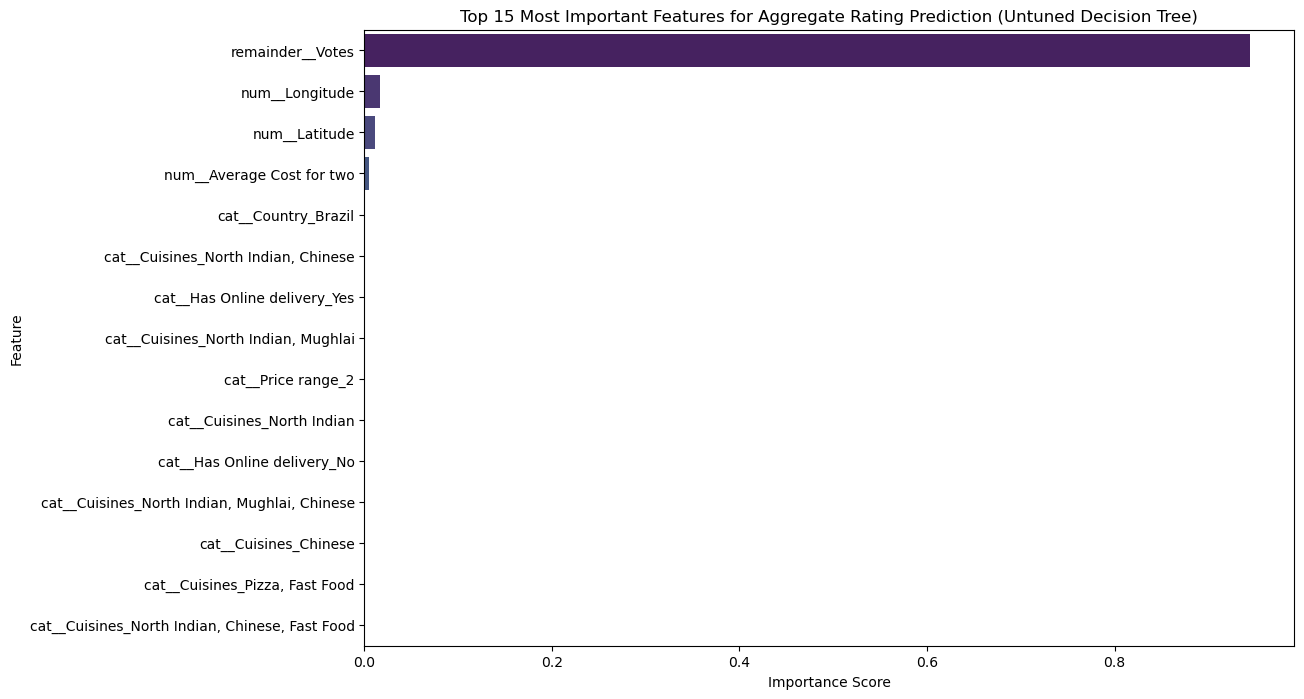

In [50]:
print("Feature Importance Analysis")
feature_importance = decision_tree_model.feature_importances_
transformed_feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature':transformed_feature_names,'Importance':feature_importance})
importances_df = importance_df.sort_values(by = 'Importance',ascending = False)
print("\nTop 15 Most Important Features:")
print(importance_df.head(18))
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Aggregate Rating Prediction (Untuned Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Top 15 Most Important Features:
                      Feature    Importance
0              num__Longitude  1.714859e-02
1               num__Latitude  1.126700e-02
2   num__Average Cost for two  4.757054e-03
3         cat__City_Abu Dhabi  5.329394e-05
4              cat__City_Agra  0.000000e+00
5         cat__City_Ahmedabad  1.961177e-05
6            cat__City_Albany  1.514456e-06
7         cat__City_Allahabad  0.000000e+00
8          cat__City_Amritsar  7.881879e-05
9            cat__City_Ankara  0.000000e+00
10         cat__City_Armidale  0.000000e+00
11           cat__City_Athens  3.786141e-07
12         cat__City_Auckland  8.490421e-06
13          cat__City_Augusta  4.391063e-06
14       cat__City_Aurangabad  4.761001e-05
15         cat__City_Balingup  0.000000e+00
16          cat__City_Bandung  0.000000e+00
17        cat__City_Bangalore  3.786141e-07


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13020\1101804273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df.head(1), palette='viridis')


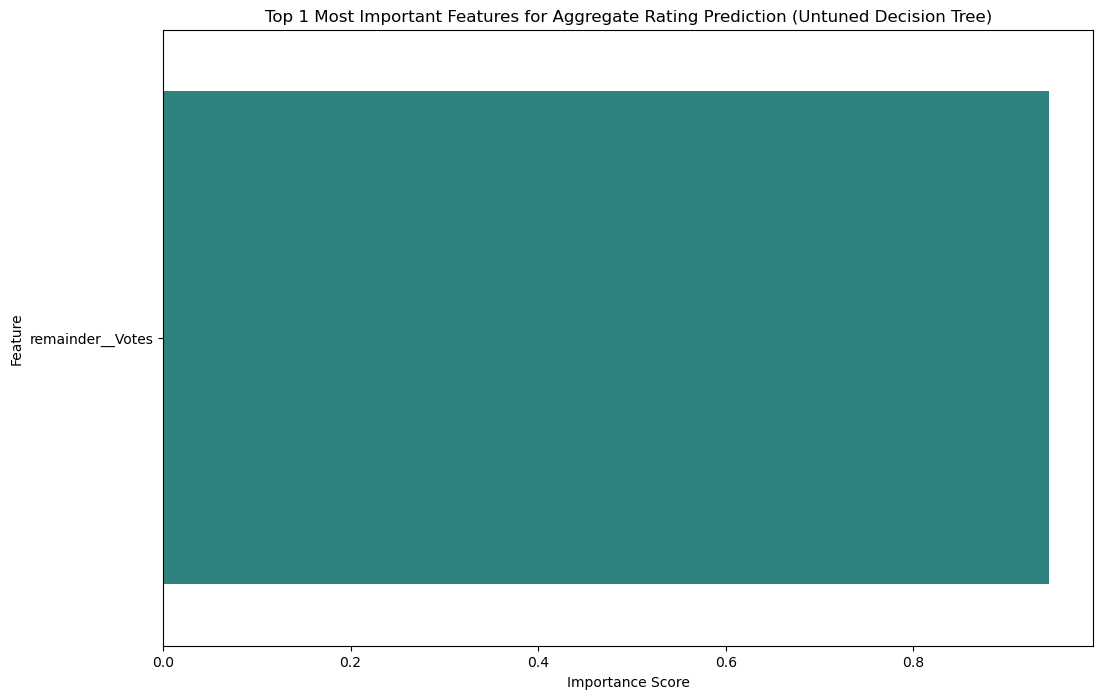

Highest Feature for Aggregate Rating Prediction:                Feature  Importance
1695  remainder__Votes    0.944608


In [53]:
print("\nTop 15 Most Important Features:")
print(importance_df.head(18))
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(1), palette='viridis')
plt.title('Top 1 Most Important Features for Aggregate Rating Prediction (Untuned Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print(f"Highest Feature for Aggregate Rating Prediction: {importances_df.head(1)}")

In [68]:
print("Comparing Actual rating Vs Predicted_value at random index")
random_index = 10
single_restaurant_features = x_test.iloc[[random_index]]
actual_rating = y_test.iloc[random_index]
single_restaurant_transformed = preprocessor.transform(single_restaurant_features)
predicted_rating = decision_tree_model.predict(single_restaurant_transformed)[0]
print(f"Selected restaurant (original features): \n{single_restaurant_transformed}")
print(f"\nActual Aggregate Rating: {actual_rating}")
print(f"Predicted Aggregate Rating: {predicted_rating:.2f}")

Comparing Actual rating Vs Predicted_value at random index
Selected restaurant (original features): 
[[ 0.31427067  0.23607693 -0.05184217 ...  0.          0.
  40.        ]]

Actual Aggregate Rating: 3.9
Predicted Aggregate Rating: 3.40


In [69]:
print("Compare the prediction to the actual rating")
prediction_error = abs(actual_rating - predicted_rating)
if prediction_error <= 0.5:
    print("\nThe model's prediction is very close to the actual rating for this restaurant!")
else:
    print("\nThe model's prediction is not as close for this particular restaurant.")

Compare the prediction to the actual rating

The model's prediction is very close to the actual rating for this restaurant!


In [70]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [71]:
import joblib
model_filename = 'decision_tree_model.joblib'
preprocessor_filename = 'preprocessor.joblib'
joblib.dump(decision_tree_model, model_filename)
print(f"Decision Tree Model saved successfully as '{model_filename}'")
joblib.dump(preprocessor, preprocessor_filename)
print(f"Preprocessor saved successfully as '{preprocessor_filename}'")

Decision Tree Model saved successfully as 'decision_tree_model.joblib'
Preprocessor saved successfully as 'preprocessor.joblib'


In [72]:
import os
if os.path.exists(model_filename) and os.path.exists(preprocessor_filename):
    loaded_model = joblib.load(model_filename)
    loaded_preprocessor = joblib.load(preprocessor_filename)
    print(f"Successfully loaded model of type: {type(loaded_model).__name__}")
    print(f"Successfully loaded preprocessor of type: {type(loaded_preprocessor).__name__}")
else:
    print("Saved files not found for loading demonstration.")

Successfully loaded model of type: DecisionTreeRegressor
Successfully loaded preprocessor of type: ColumnTransformer


In [73]:
new_restaurant_data = {
    'City': ['Gurgaon'],
    'Longitude': [77.0886],
    'Latitude': [28.4616],
    'Cuisines': ['North Indian, Chinese'],
    'Average Cost for two': [1500],
    'Has Table booking': ['Yes'],
    'Has Online delivery': ['Yes'],
    'Is delivering now': ['Yes'],
    'Price range': [3],
    'Country': ['India'],
    'Votes': [520]
}
new_restaurant_df = pd.DataFrame(new_restaurant_data)
transformed_new_data = loaded_preprocessor.transform(new_restaurant_df)
prediction = loaded_model.predict(transformed_new_data)
predicted_rating = prediction[0]
print("\nPrediction for this new restaurant:")
print(f"**Predicted Aggregate Rating: {predicted_rating:.2f}**")


Prediction for this new restaurant:
**Predicted Aggregate Rating: 4.10**
